# COMMENTS ANALYSIS

In this notebook, comments data set is explored, cleaned. Then the sentiment of each comment is computed, in order to obtain one of our key metrics to define the success of an Airbnb.

This means:
- cleaning NaN values, or comments only filled with spaces
- handling different languages
- getting the sentiment of comments 

*Comments from Amsterdam were used here as an example, but the same will be performed for each city we want to analyze.*

In [1]:
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from langdetect import detect

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [2]:
# loading datas 
comments = pd.read_csv('./data/2019-09-14_Amsterdam_reviews.csv', header=0)
comments.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [3]:
print('This dataset contains', comments.shape[0], 'lines.')

This dataset contains 484507 lines.


#### What kind of information does each column contain ?

listing_id:             id of a housing <br/>
id:                     id of the comment? <br/>
date:                   date of the comment <br/>
reviewer_id:            id of the person which commented on the housing <br/>
reviewer_name:          name of the person which commented on the housing <br/>
comments:               comment <br/>

# Cleaning the comments

In [4]:
# first check for NaN 
comments.isna()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
484502,False,False,False,False,False,False
484503,False,False,False,False,False,False
484504,False,False,False,False,False,False
484505,False,False,False,False,False,False


In [5]:
# are there any NaN?
comments.isna().values.any()

True

In [6]:
# how many NaN and in which column(s)?
comments.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         213
dtype: int64

In [7]:
# let's remove them
comments = comments.dropna(how='any',axis=0)

In [8]:
# check if the removing step was well performed
comments.shape[0]

484294

In [9]:
# are there any comment only filled with whitespaces?
comments['isSpace'] = comments['comments'].apply(lambda x: x.isspace())
nb = comments[comments["isSpace"] == True].count()
nb

listing_id       3
id               3
date             3
reviewer_id      3
reviewer_name    3
comments         3
isSpace          3
dtype: int64

In [10]:
# let's remove them 
comments = comments[comments.isSpace == False]

In [11]:
# check if the removing step was well performed
comments.shape[0]

484291

In [12]:
# the column 'isSpace' will not be useful anymore so let's remove it
comments = comments.drop(columns=['isSpace'])
comments.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [13]:
# remove all non-alphabetical characters to allow detect() to work
regex = re.compile('[^A-Za-zÀ-ÿ]')      
comments['rm_comments'] = comments['comments'].apply(lambda x: regex.sub(' ', x))
comments.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,rm_comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended He provided all...


In [14]:
# after this transformation need to check again for comments that are only filled with whitespaces
# (as some comments were only made of non-alphabetical characters)
comments['isSpace'] = comments['rm_comments'].apply(lambda x: x.isspace())
nb = comments[comments["isSpace"] == True].count()
nb

listing_id       4247
id               4247
date             4247
reviewer_id      4247
reviewer_name    4247
comments         4247
rm_comments      4247
isSpace          4247
dtype: int64

In [15]:
# remove them
comments = comments[comments.isSpace == False]
comments.shape[0]

480044

In [16]:
# once again the column 'isSpace' will not be useful anymore so let's remove it
comments = comments.drop(columns=['isSpace'])
comments.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,rm_comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended He provided all...


# Handling different languages

In [17]:
# detect the language of each comment
comments['language'] = comments['rm_comments'].apply(lambda x: detect(x))

In [18]:
# as the previous step takes some time, the result is saved and can be loaded for further use
comments.to_pickle("./comments_wlanguages_final.pkl")

In [19]:
# load data
#comments = pd.read_pickle("./comments_wlanguages.pkl")

In [20]:
comments.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,rm_comments,language
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool The place was nice and ...,en
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host His place is ...,en
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam Daniel ...,en
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation Room is very clea...,en
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended He provided all...,en


In [21]:
# how many of the comments are not in english?
not_en = comments[comments["language"] != 'en'].count()
not_en

listing_id       88986
id               88986
date             88986
reviewer_id      88986
reviewer_name    88986
comments         88986
rm_comments      88986
language         88986
dtype: int64

For now, a functioning manner to translate the non-english comments has yet to be found. An attempted solution was the use of the  `googletrans Translator()`, unfortunately, it seemed to block the IP address of the computer when a large number of translations were requested. 

Therefore, the next steps will only be performed on english comments, while we elaborate another solution.

In [22]:
# keep only english comments
comments_en = comments.copy()
comments_en = comments_en[comments_en.language == 'en']

In [23]:
comments_en.shape[0]

391058

# Sentiment computing

In [24]:
# dataFrame with comments only in english
comments_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,rm_comments,language
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool The place was nice and ...,en
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host His place is ...,en
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam Daniel ...,en
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation Room is very clea...,en
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended He provided all...,en


In [25]:
# non-alphabetical characters are removed but the ponctuation in the comments is kept
regex2 = re.compile('[^A-Za-zÀ-ÿ?!.,:;]')     
comments_en['ap_comments'] = comments_en['comments'].apply(lambda x: regex2.sub(' ', x))
comments_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,rm_comments,language,ap_comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,Daniel is really cool The place was nice and ...,en,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,Daniel is the most amazing host His place is ...,en,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,We had such a great time in Amsterdam Daniel ...,en,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,Very professional operation Room is very clea...,en,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,Daniel is highly recommended He provided all...,en,Daniel is highly recommended. He provided all...


In [26]:
# remove unnecessary columns for next steps
comments_en = comments_en.drop(columns=['comments', 'rm_comments', 'language'])
comments_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,ap_comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [27]:
def get_sentiment(comment):
    '''
    takes a comment as an argument, sent_tokenize() it to seperate the sentences
    then computes the scores of negativity, neutrality, positivity and compound for each sentence
    and finally compute the mean of these scores for the whole comment
    
    '''
    # tokenize comment to get seperated sentences
    comment_tk = nltk.sent_tokenize(comment)
    
    # compute sentiment scores for each sentence
    scores = list()
    for c in comment_tk:
        scores.append(sid.polarity_scores(c))
    
    # compute mean scores for the comment
    neg = 0
    neu = 0
    pos = 0
    comp = 0
    for i in range(len(comment_tk)):
        neg += scores[i]['neg']
        neu += scores[i]['neu']
        pos += scores[i]['pos']
        comp += scores[i]['compound']
    
    mean_neg = neg/len(comment_tk)
    mean_neu = neu/len(comment_tk)
    mean_pos = pos/len(comment_tk)
    mean_comp = comp/len(comment_tk)
    
    return [mean_neg, mean_neu, mean_pos, mean_comp]

In [28]:
# get sentiment
comments_en['sentiment'] = comments_en['ap_comments'].apply(lambda x: get_sentiment(x))
comments_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,ap_comments,sentiment
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,"[0.021714285714285714, 0.6577142857142857, 0.3..."
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,"[0.0, 0.5814999999999999, 0.4185, 0.59855]"
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,"[0.0125, 0.706, 0.2815, 0.36860000000000004]"
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,"[0.0, 0.6302500000000001, 0.36975, 0.53835]"
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,"[0.0, 0.6803999999999999, 0.3196, 0.4027599999..."


In [29]:
# get a column for each different score (neg, pos, neu, comp) of each comment
comments_en[['negativity','neutrality', 'positivity', 'compound']] = pd.DataFrame(comments_en.sentiment.values.tolist(), index = comments_en.index)
comments_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,ap_comments,sentiment,negativity,neutrality,positivity,compound
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,"[0.021714285714285714, 0.6577142857142857, 0.3...",0.021714,0.657714,0.320571,0.213029
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,"[0.0, 0.5814999999999999, 0.4185, 0.59855]",0.000000,0.581500,0.418500,0.598550
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,"[0.0125, 0.706, 0.2815, 0.36860000000000004]",0.012500,0.706000,0.281500,0.368600
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,"[0.0, 0.6302500000000001, 0.36975, 0.53835]",0.000000,0.630250,0.369750,0.538350
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,"[0.0, 0.6803999999999999, 0.3196, 0.4027599999...",0.000000,0.680400,0.319600,0.402760


In [30]:
# remove unnecessary column
comments_en = comments_en.drop(columns=['sentiment'])
comments_en.head()

,listing_id,id,date,reviewer_id,reviewer_name,ap_comments,negativity,neutrality,positivity,compound
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...,0.021714,0.657714,0.320571,0.213029
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...,0.000000,0.581500,0.418500,0.598550
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,0.012500,0.706000,0.281500,0.368600
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...,0.000000,0.630250,0.369750,0.538350
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...,0.000000,0.680400,0.319600,0.402760


In [31]:
# work on a copy as we remove columns that could be useful afterwards
comments_en_copy = comments_en.copy()
comments_en_copy = comments_en_copy.drop(columns=['id', 'date', 'reviewer_id', 'reviewer_name', 'ap_comments'])

In [32]:
# compute the mean of each score (neg, pos, neu, comp) for a given housing (-> using listing_id to groupby)
comments_en_copy = comments_en_copy.groupby('listing_id').mean()
comments_en_copy.head()

,negativity,neutrality,positivity,compound
listing_id,,,,
2818,0.008285,0.675346,0.304521,0.485840
20168,0.017461,0.660419,0.316384,0.448776
25428,0.000000,0.776000,0.224000,0.464547
27886,0.012159,0.621241,0.362951,0.540527
28871,0.008423,0.602091,0.373064,0.539098


In [33]:
print('There are', comments_en_copy.shape[0], 'different housings in this city.')

There are 17589 different housings in this city.


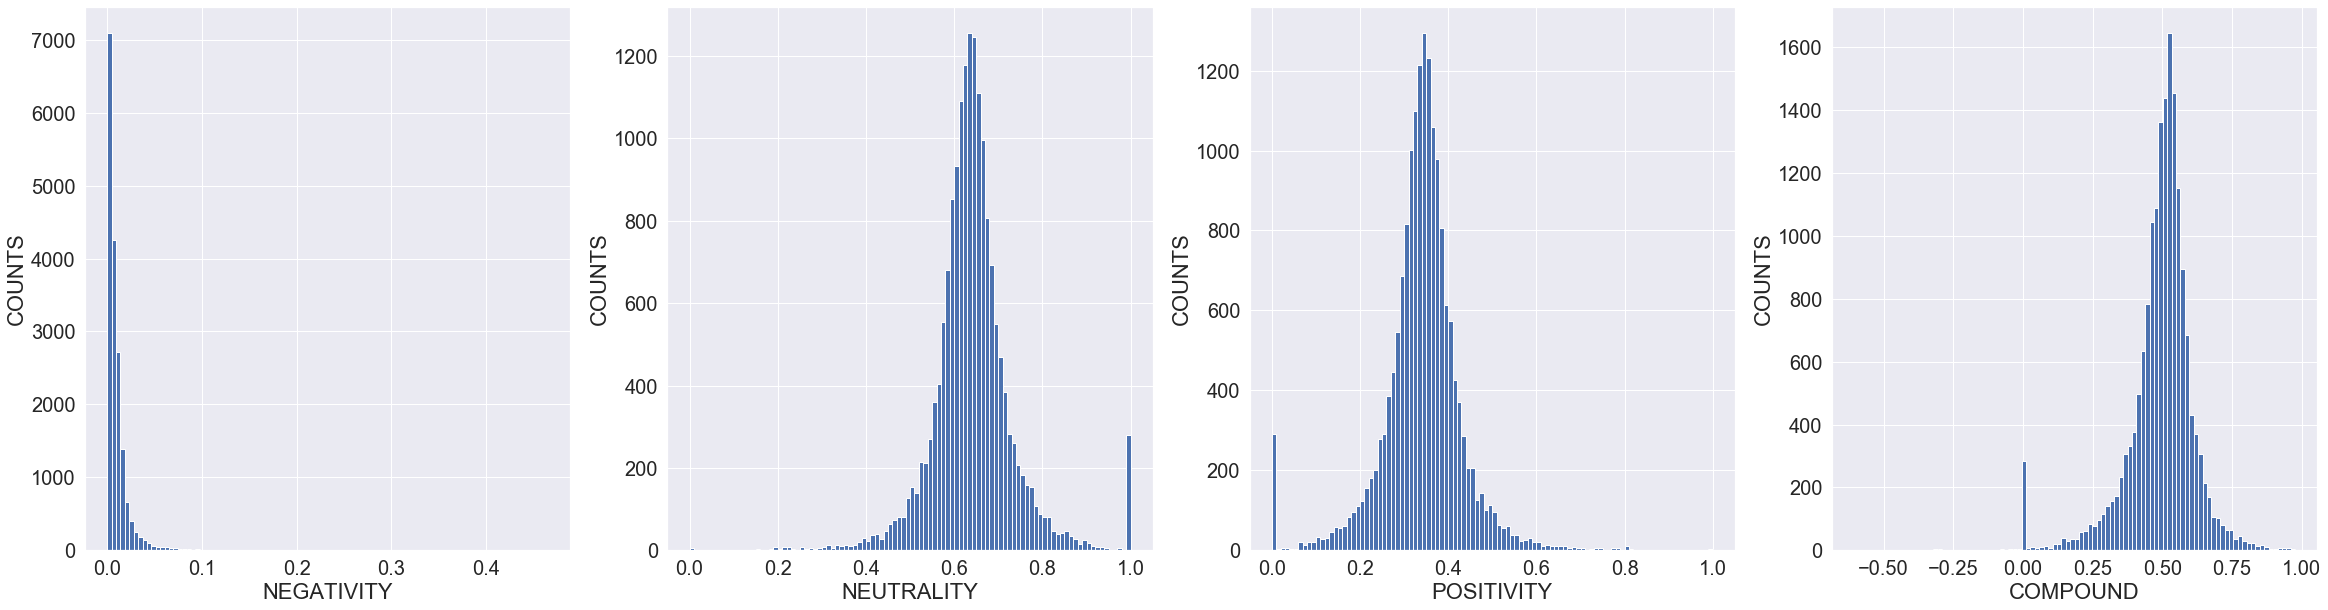

In [34]:
fig = plt.figure(figsize=(40, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set(font_scale = 2)

ax1 = plt.subplot(1, 4, 1)
ax1 = comments_en_copy['negativity'].hist(bins=100)
ax1.set_xlabel("NEGATIVITY",fontsize=22)
ax1.set_ylabel("COUNTS",fontsize=22)
plt.tick_params(labelsize=20)

ax2 = plt.subplot(1, 4, 2)
ax2 = comments_en_copy['neutrality'].hist(bins=100)
ax2.set_xlabel("NEUTRALITY",fontsize=22)
ax2.set_ylabel("COUNTS",fontsize=22)
plt.tick_params(labelsize=20)

ax3 = plt.subplot(1, 4, 3)
ax3 = comments_en_copy['positivity'].hist(bins=100)
ax3.set_xlabel("POSITIVITY",fontsize=22)
ax3.set_ylabel("COUNTS",fontsize=22)
plt.tick_params(labelsize=20)

ax4 = plt.subplot(1, 4, 4)
ax4 = comments_en_copy['compound'].hist(bins=100)
ax4.set_xlabel("COMPOUND",fontsize=22)
ax4.set_ylabel("COUNTS",fontsize=22)
plt.tick_params(labelsize=20)

By plotting the distribution of listings for each components of a sentiment, we observe the following:
- Negativity seems to follow a power law distribution, such that only very few airbnbs have mostly negative comments. 
- Neutrality has a gaussian distribution centered around 0.6, meaning that comments are generally opinionated.
- We notice a single peak in numbers of listing that have 1.0 in neutrality (adds to the number of listings that have 0.0 in negativity and 0.0 in positivity). This is due to a surprising amount of comments using only neutral words.
- Positivity has a gaussian distribution centered around 0.4, meaning that a considerable amount of listings get positive sentiments in their reviews.
- Compound seems to follow a gaussian distribution centered in 0.5, which could be explained by the fact that comments usually express a positive sentiment.
